In [1]:
#Варіант 4, Давидов Євген ФІТ-4-6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1. Прочитайте CSV файл
df = pd.read_csv('D:/Учеба/Машинне Навчання/Fw/GlobalYouTubeStatistics.csv',  encoding = "ISO-8859-1")
#2. Виведіть перші п'ять рядків
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [8]:
#3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів.
print("Розміри датасету:", df.shape)
print(" ")
nans = df.isnull().sum()
print("Пропуски:", nans)
print(" ")
duplicates = df.duplicated().sum()
print("Дублікати:", duplicates)

Розміри датасету: (995, 28)
 
Пропуски: rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month       

In [12]:
#4. Якщо є пропуски, замінить тип даних на float і середнє значення за стовпцем
numericColumns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numericColumns:
    average_value = df[column].mean()
    df[column].fillna(average_value, inplace=True)
    df[column] = df[column].astype('float32')
df.dtypes

rank                                       float32
Youtuber                                    object
subscribers                                float32
video views                                float32
category                                    object
Title                                       object
uploads                                    float32
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float32
country_rank                               float32
channel_type_rank                          float32
video_views_for_the_last_30_days           float32
lowest_monthly_earnings                    float32
highest_monthly_earnings                   float32
lowest_yearly_earnings                     float32
highest_yearly_earnings                    float32
subscribers_for_last_30_days               float32
created_year                   

In [13]:
#5. Ще раз перевірте кількість пропусків
nans = df.isnull().sum()
print("Пропуски:", nans)
#Пропуски лишилися тільки у текстових колонках

Пропуски: rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                5
cre

In [14]:
#6. Перевірте, скільки унікальних країн представлено у колонці "Country"
countriesUnique = df['Country'].nunique()
print("Унікальні країни: ", countriesUnique)

Унікальні країни:  49


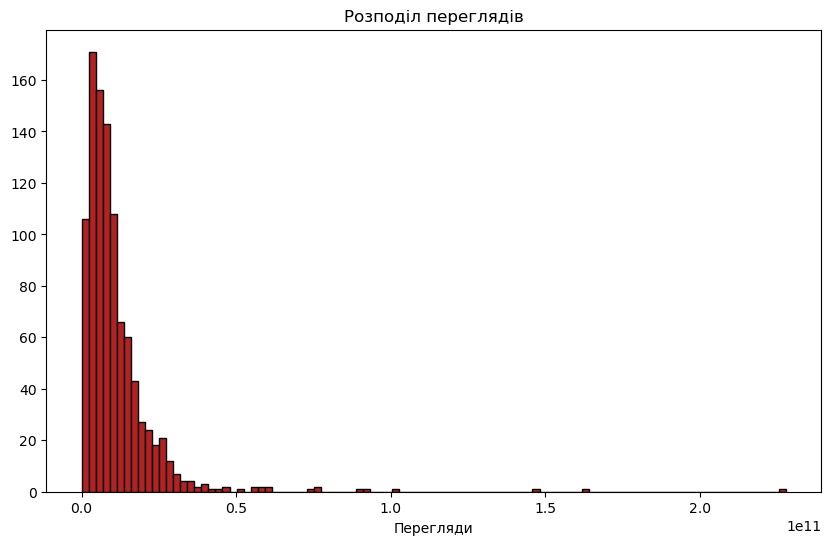

In [27]:
#7. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
plt.figure(figsize=(10, 6))
plt.hist(df['video views'], bins=100, color='firebrick', edgecolor='black')
plt.title('Розподіл переглядів')
plt.xlabel('Перегляди')
plt.show()

In [33]:
#8. Визначте максимальну, мінімальну, середню кількість переглядів(використовуйте методи max, min, mean)
maxViews = df['video views'].max()
print("Максимальна кількість переглядів: ", maxViews)
print(" ")
minViews = df['video views'].min()
print("Мінімальна кількість переглядів: ", minViews)
print(" ")
meanViews = df['video views'].mean()
print("Середня кількість переглядів: ", meanViews)
print(" ")

Максимальна кількість переглядів:  228000006144.0
 
Мінімальна кількість переглядів:  0.0
 
Середня кількість переглядів:  11039537000.0
 


In [38]:
#9. Знайдіть країну, де найбільше відео було завантажено на YouTube
mostUploads = df.loc[df["uploads"].idxmax(), "Country"]
print("Країна з найбільшою кількістю завантажених відео: ", mostUploads)

Країна з найбільшою кількістю завантажених відео:  India


In [40]:
#10. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.
titleMostUploads = df.loc[df["uploads"].idxmax(), "Title"]
print("Відео з найбільшою кількістю завантажень: ", titleMostUploads)
titleLeastUploads = df.loc[df["uploads"].idxmin(), "Title"]
print("Відео з найменшою кількістю завантажень: ", titleLeastUploads)

Відео з найбільшою кількістю завантажень:  ABP NEWS
Відео з найменшою кількістю завантажень:  Music
